<a href="https://colab.research.google.com/github/vishrav06/IEEE_CS_Task/blob/main/Fashion_Items_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

#Level 1

##Reading the dataset

In [220]:
df = pd.read_csv('/content/drive/MyDrive/dataset_aiml_task/dataset_aiml_task/data.csv')

##Analyzing the basic structure of the dataset

In [221]:
df.shape

(60000, 785)

In [222]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [223]:
df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


####Splitting the data into Labels(y) and training features(x)

In [224]:
y_train = df['label']

In [225]:
x_train = df.drop('label', axis=1)

In [226]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 358.9 MB


In [227]:
x_train.iloc[0]

,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
pixel5,0
...,...
pixel780,0
pixel781,0
pixel782,0
pixel783,0


####Creating a 2D version of all the images for display purposes

In [228]:
x_train_2D = x_train.to_numpy().reshape(x_train.shape[0], 28, 28)
x_train_2D.shape

(60000, 28, 28)

####Function to show a single image

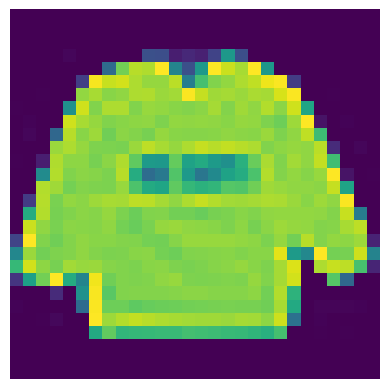

In [229]:
def show_img(img):
  plt.imshow(img)
  plt.axis('off')
  plt.show()

show_img(x_train_2D[0])

##Function to display 5 sample images for each label

In [230]:
def print_images_by_label(x, y):
  unique_labels = np.unique(y)

  for label in unique_labels:
    indices = np.where(y == label)[0]
    random_indices = np.random.choice(indices, size=5, replace=False)

    fig, axes = plt.subplots(1, 5, figsize=(15, 3))

    for i, idx in enumerate(random_indices):
      axes[i].imshow(x[idx])
      axes[i].set_title(f'Label: {label}')
      axes[i].axis('off')

    plt.show()

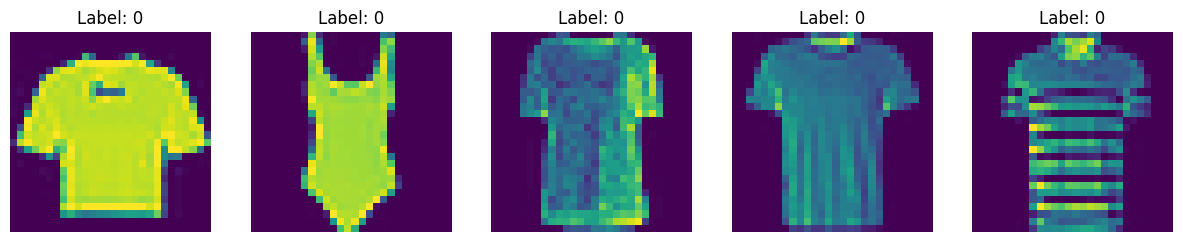

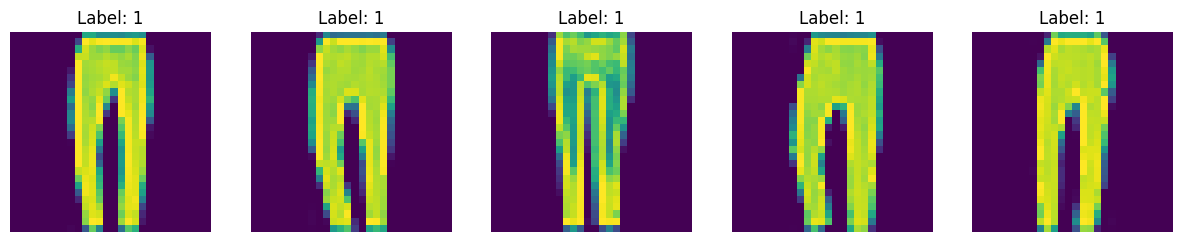

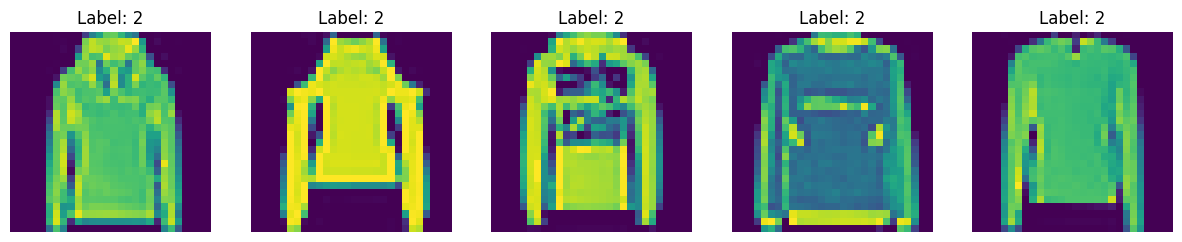

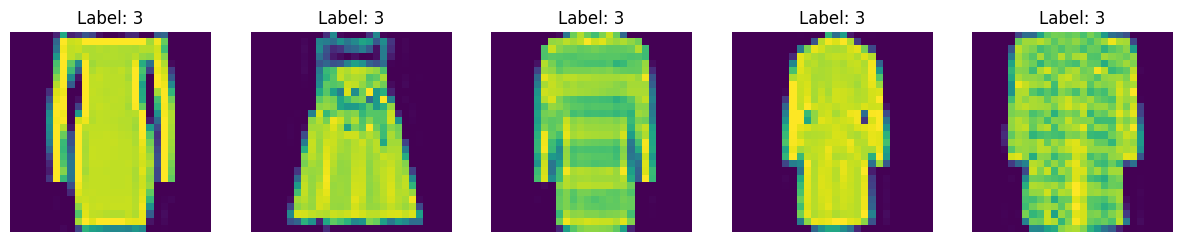

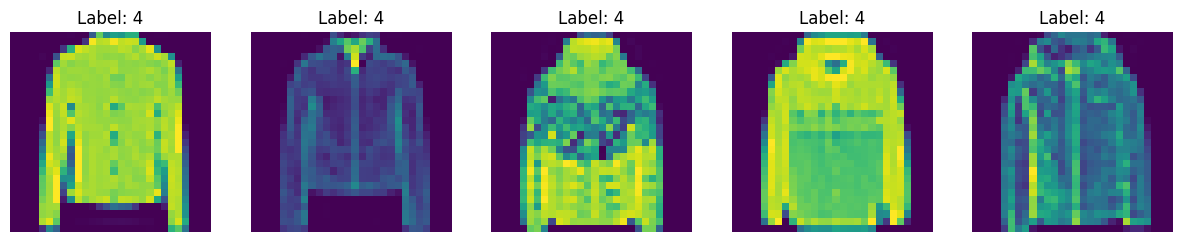

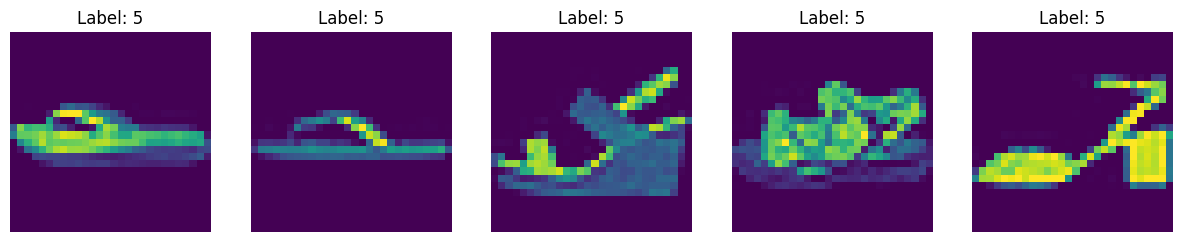

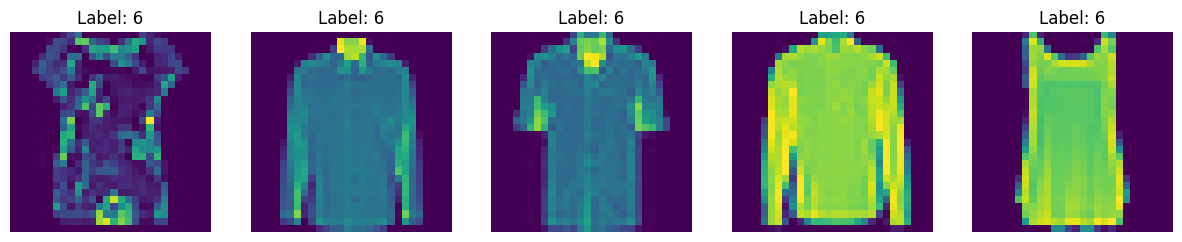

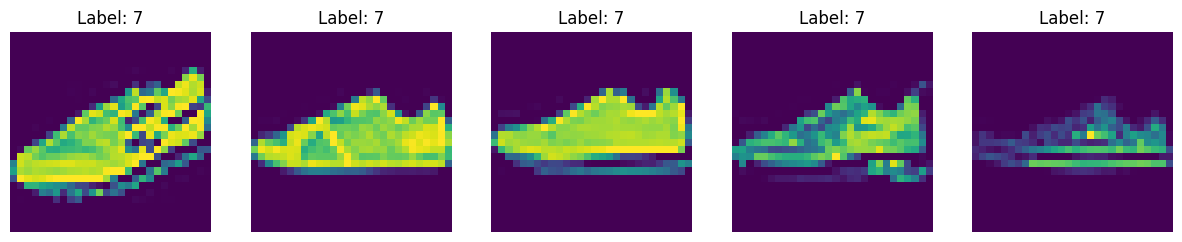

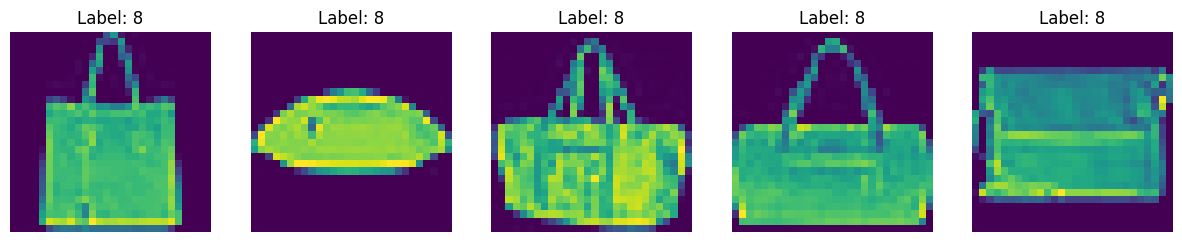

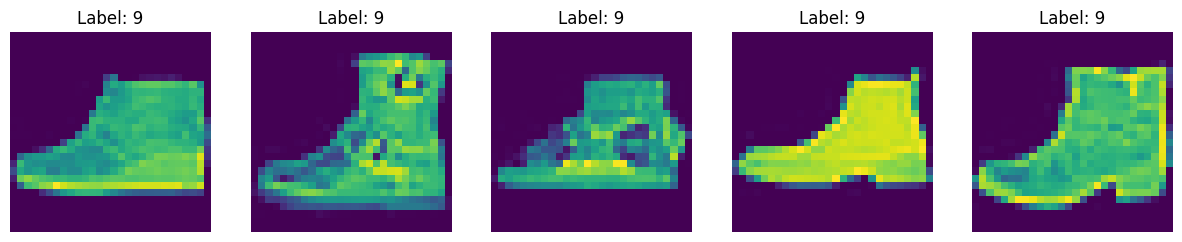

In [231]:
print_images_by_label(x_train_2D, y_train)

##Creating a histogram to find the distribution of pixel values in a single image

In [232]:
def create_hist(img):
  data = img
  plt.hist(data, bins=26)
  plt.xlabel('Pixel Value')
  plt.ylabel('Frequency')
  plt.title('Histogram of Pixel Values')
  plt.show()

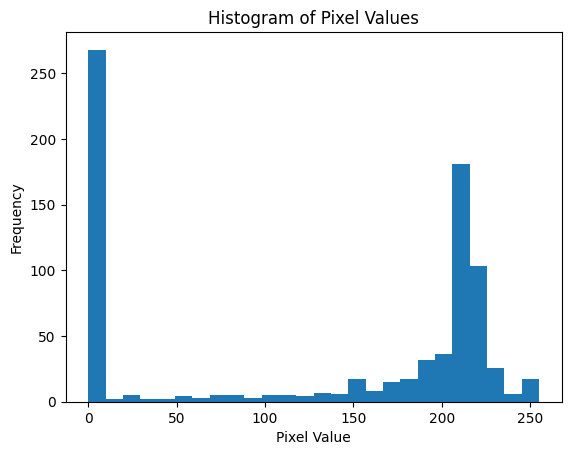

In [233]:
create_hist(x_train.iloc[8])

From the above histogram, we can see that the majority of the pixels are black and everything else lies in the range of about 180-256.

##Major Statistics

In [234]:
from scipy.stats import skew
def pixel_statistics(img):
  mean = np.mean(img)
  median = np.median(img)
  std = np.std(img)
  skewness = skew(img)
  print(f'Mean: {mean:.2f}')
  print(f'Median: {median:.2f}')
  # Mode is 0 for all images in the dataset
  print(f'Standard Deviation: {std:.2f}')
  print(f'Skewness: {skewness:.2f}')

In [235]:
pixel_statistics(x_train.iloc[0])

Mean: 115.35
Median: 166.00
Standard Deviation: 103.17
Skewness: -0.13


###For each individual pixel value(Feature)
Not very useful

In [236]:
x_train.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,14.488767,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,38.334549,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


#Level 2

##Splitting the data into Training, Testing and Cross Validation Set

In [237]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=42)
x_test, x_cv, y_test, y_cv = train_test_split(x_test, y_test, test_size=0.5, random_state=42)
print(x_train.shape, x_test.shape, x_cv.shape)
print(y_train.shape, y_test.shape, y_cv.shape)

(42000, 784) (9000, 784) (9000, 784)
(42000,) (9000,) (9000,)


##Normalization

We'll be normalizing using min_max_scaling since that maintains original distribution

In [238]:
x_train = x_train.astype('float32')/255.0
x_cv = x_cv.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [239]:
x_train.iloc[1].describe()

,17141
count,784.000000
mean,0.260044
std,0.322306
min,0.000000
25%,0.000000
50%,0.000000
75%,0.545098
max,1.000000


##Create Model

In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
model = LogisticRegression(solver = 'lbfgs',max_iter=1000, multi_class='multinomial')
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [241]:
from sklearn.metrics import classification_report
lr_pred = model.predict(x_test)
print(accuracy_score(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, y_pred))

0.849
[[748   5  16  40   3   0  89   0   9   0]
 [  3 863   5  28   3   0   2   0   0   0]
 [ 13   1 674  12 108   0  87   0   5   0]
 [ 31  15  12 819  39   0  25   0   0   0]
 [  3   5  89  37 660   0  73   0   3   0]
 [  1   0   1   0   0 814   0  35   8  14]
 [130   3 101  33 106   0 565   0  20   1]
 [  0   0   0   0   0  28   0 861   2  21]
 [  6   0   4   3   3   8  17   4 800   0]
 [  1   0   0   0   0  15   0  31   2 837]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       910
           1       0.99      0.97      0.98       904
           2       0.82      0.82      0.82       900
           3       0.90      0.89      0.90       941
           4       0.78      0.82      0.80       870
           5       0.96      0.96      0.96       873
           6       0.75      0.72      0.73       959
           7       0.94      0.95      0.95       912
           8       0.97      0.97      0.97       845
           9       0.9

##Explaining Model Predictions

In [242]:
#Using SHAP
import shap

explainer = shap.Explainer(model.predict_proba, x_train,  max_evals=1569)  # Explaining probabilities
shap_values = explainer(x_test[:50])



PermutationExplainer explainer: 51it [01:07,  1.54s/it]


I'm only using the first 50 data points of the testing dataset because the SHAP algorithm takes a lot of time and resources and the dataset is too large.

SHAP for class 0


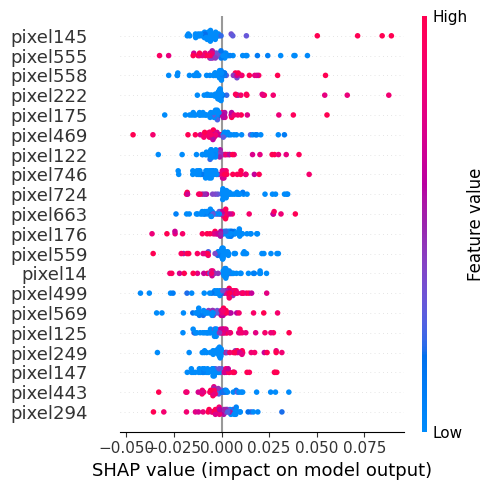

SHAP for class 1


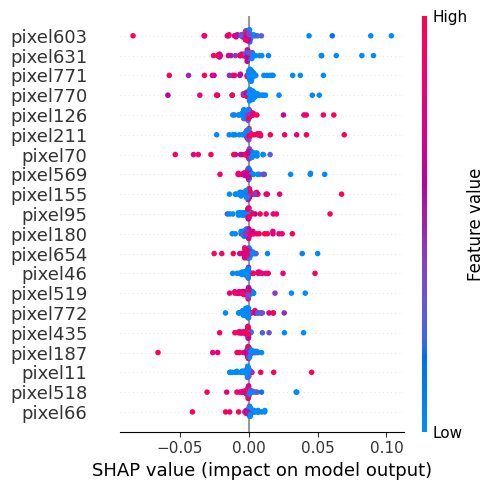

SHAP for class 2


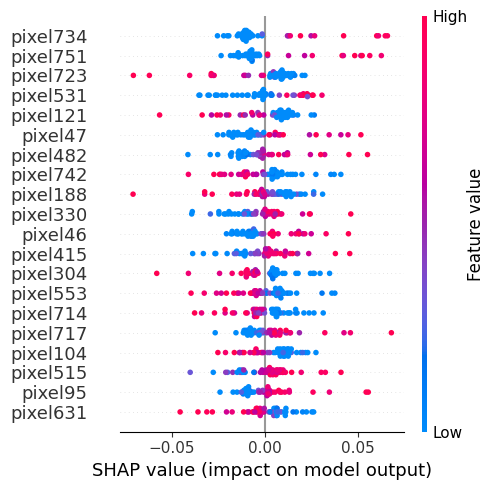

SHAP for class 3


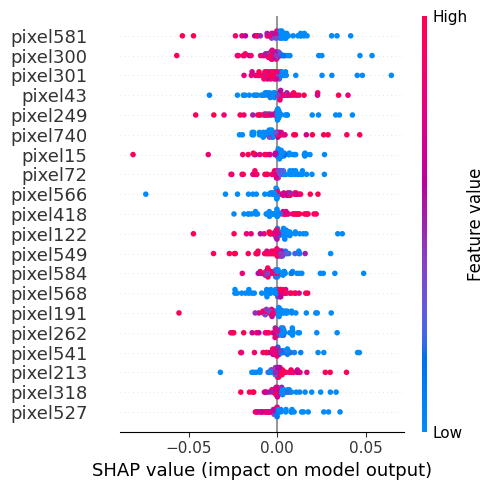

SHAP for class 4


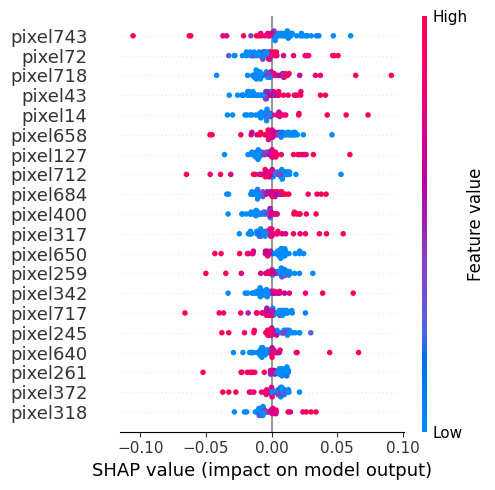

SHAP for class 5


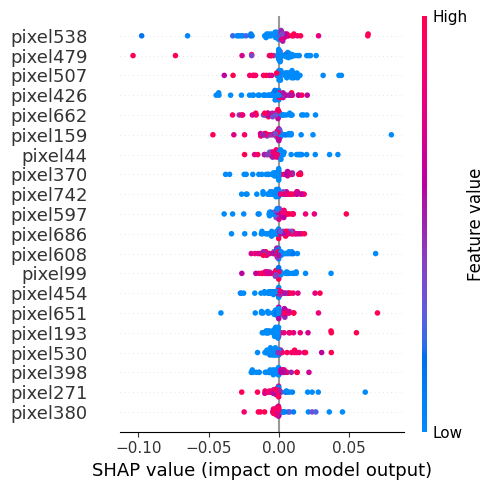

SHAP for class 6


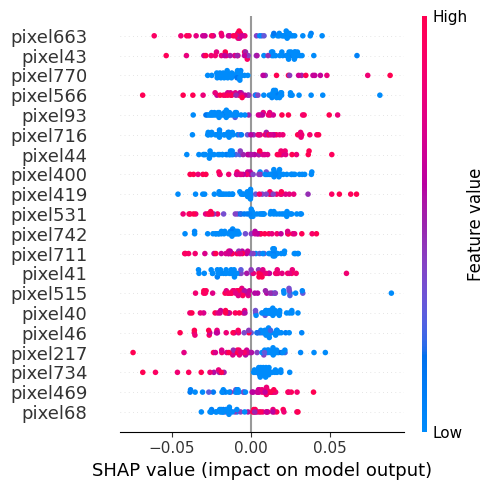

SHAP for class 7


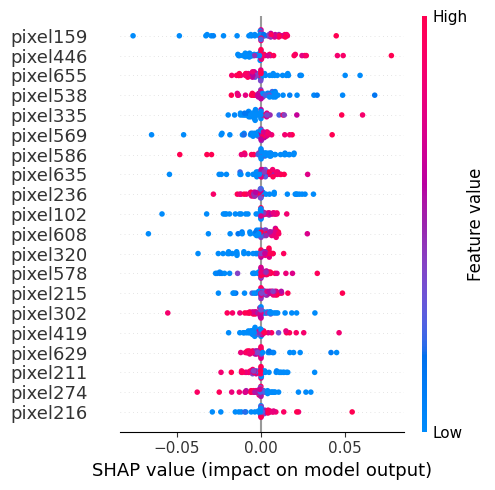

SHAP for class 8


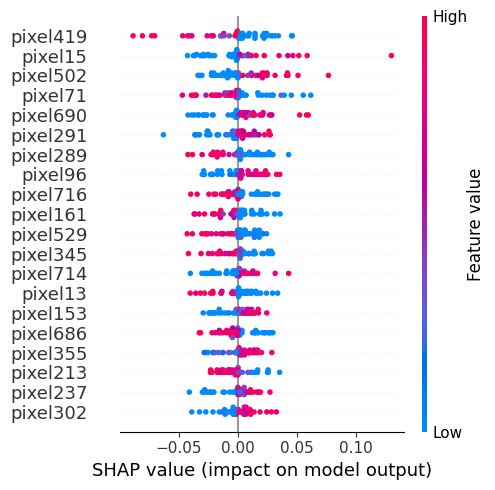

SHAP for class 9


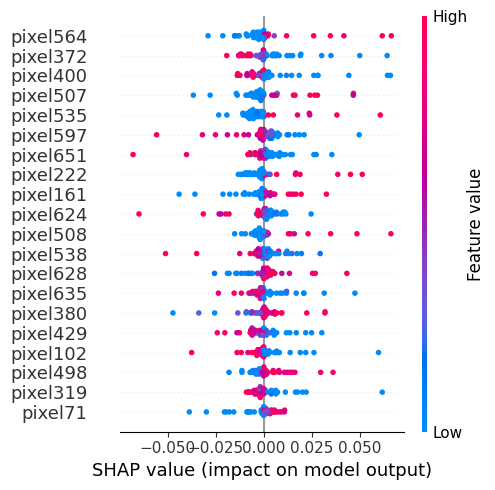

In [243]:
# Visualizing SHAP values for each class
for i in range(model.classes_.size):
    print(f"SHAP for class {i}")
    shap.summary_plot(shap_values[:, :, i], x_test[:50], plot_size=(5,5))

In the above plots, we can see which pixel positions are the most important in order to predict the respective class and if the pixel values are corelated positively or negatively.

###Plotting feature importance

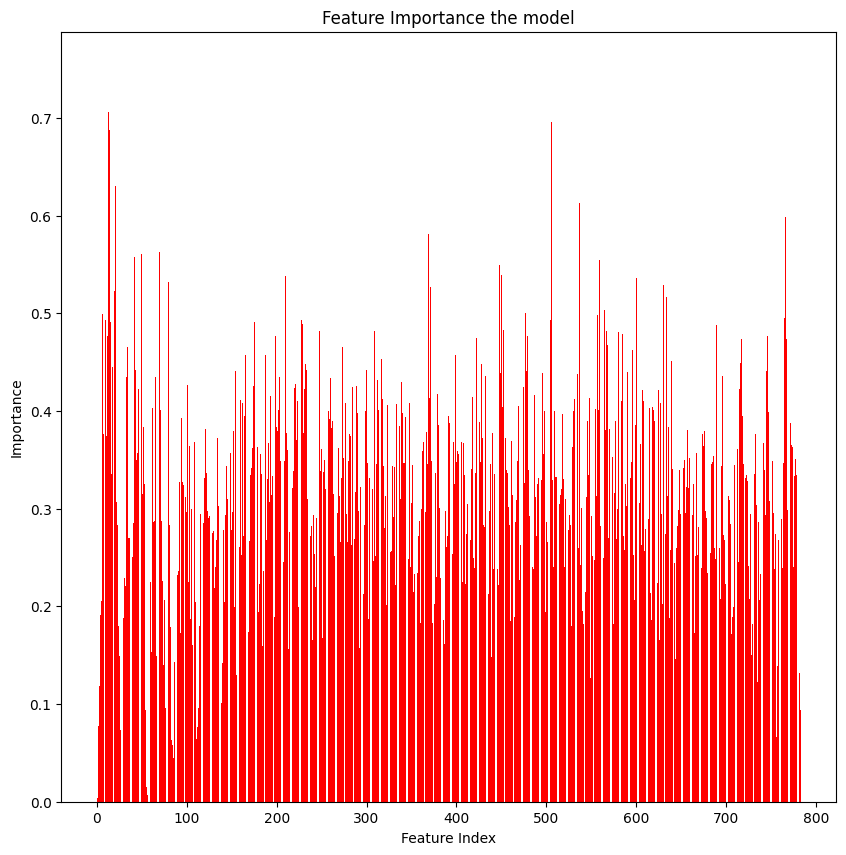

Pixel which is the most important:	770
Pixel which is the least important:	1


In [244]:
# Get feature importance (absolute value of coefficients)
feature_importance = np.abs(model.coef_).mean(axis=0)

# Plot feature importance
plt.figure(figsize=(10, 10))
plt.bar(range(len(feature_importance)), feature_importance, color = 'red')
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importance the model")
plt.show()
print(f'Pixel which is the most important:\t{np.argmax(feature_importance)}')
print(f'Pixel which is the least important:\t{np.argmin(feature_importance)}')

#Level 3

###Creating a Neural Network

In [245]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential(
    [
     Input(shape=(784,)),
     Dense(128, activation='relu'),
     Dense(64, activation='relu'),
     Dense(10, activation='softmax')
    ]
)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


###Use callbacks for efficient training

In [246]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', verbose = 1, patience=20, min_delta=0.0001, restore_best_weights=True)

In [247]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-4, verbose=1)

###Train the model

In [248]:
history = model.fit(x_train, y_train, epochs=100, batch_size= 128, validation_data=(x_cv, y_cv), callbacks=[early_stopping, lr_scheduler])

Epoch 1/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7222 - loss: 0.8188 - val_accuracy: 0.8329 - val_loss: 0.4723 - learning_rate: 0.0010
Epoch 2/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8485 - loss: 0.4238 - val_accuracy: 0.8592 - val_loss: 0.3946 - learning_rate: 0.0010
Epoch 3/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8601 - loss: 0.3888 - val_accuracy: 0.8644 - val_loss: 0.3830 - learning_rate: 0.0010
Epoch 4/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8749 - loss: 0.3502 - val_accuracy: 0.8730 - val_loss: 0.3554 - learning_rate: 0.0010
Epoch 5/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8811 - loss: 0.3254 - val_accuracy: 0.8780 - val_loss: 0.3424 - learning_rate: 0.0010
Epoch 6/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8872 - loss: 0.3089 - val_accuracy: 0.8756 - val_loss: 0.3421 - learning_rate: 0.0010
Epoch 7/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8922 - loss: 0.

In [249]:
history = pd.DataFrame(history.history)

In [250]:
history.tail()

,accuracy,loss,val_accuracy,val_loss,learning_rate
34,0.957571,0.124352,0.893778,0.326686,0.0001
35,0.958452,0.122853,0.896000,0.322918,0.0001
36,0.959476,0.121460,0.894889,0.327071,0.0001
37,0.959690,0.120414,0.894778,0.328852,0.0001
38,0.959643,0.119489,0.895000,0.332224,0.0001


###Metrics of classification

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
0.8888888888888888


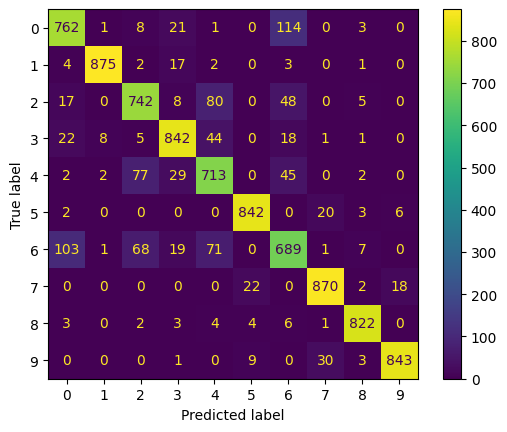

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       910
           1       0.99      0.97      0.98       904
           2       0.82      0.82      0.82       900
           3       0.90      0.89      0.90       941
           4       0.78      0.82      0.80       870
           5       0.96      0.96      0.96       873
           6       0.75      0.72      0.73       959
           7       0.94      0.95      0.95       912
           8       0.97      0.97      0.97       845
           9       0.97      0.95      0.96       886

    accuracy                           0.89      9000
   macro avg       0.89      0.89      0.89      9000
weighted avg       0.89      0.89      0.89      9000



In [251]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
y_pred = model2.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(classification_report(y_test, y_pred))

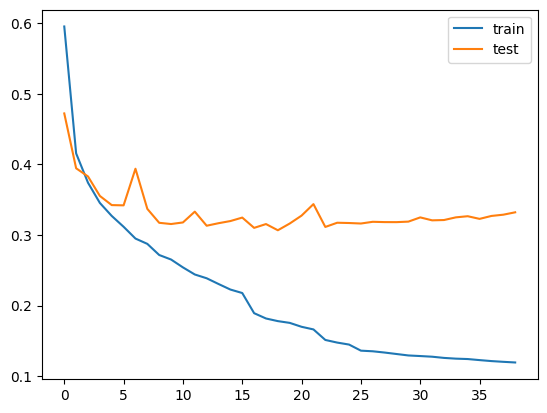

In [252]:
plt.plot(history['loss'], label='train')
plt.plot(history['val_loss'], label='test')
plt.legend()
plt.show()